# Time Series Decomposition

Time series decomposition is the process of separating a time series into its underlying components to better understand and analyze the patterns within the data. These components typically include:

### 1. **Trend (T)**
The long-term direction of the data, which can be upward, downward, or flat. This component captures the general movement over a large period of time.

### 2. **Seasonality (S)**
Seasonality refers to regular, repeating patterns or cycles in the data over a fixed period (e.g., daily, weekly, yearly). It captures the variations in the data that are repeated at specific intervals.

### 3. **Cyclic (C)**
Cyclic patterns refer to fluctuations that occur over a period of time, but unlike seasonality, the cycles don't have a fixed, regular pattern. Cycles are typically longer than seasonal patterns.

### 4. **Residual (R) or Noise**
The random variations or irregular fluctuations that cannot be explained by the trend, seasonality, or cyclic components. This component captures the "error" or randomness in the data.

---

## Mathematical Representation

A time series can be modeled as either additive or multiplicative.

- **Additive Model:**


Y(t) = T(t) + S(t) + C(t) + R(t)


- **Multiplicative Model:**


Y(t) = T(t) * S(t) * C(t) * R(t)

Where:
- Y(t)- is the observed value at time
- T(t)- is the trend component
- S(t)- is the seasonal component
- C(t)- is the cyclic component
- R(t)- is the residual or noise

---



## Importance of Decomposition in Time Series

### 1. **Better Understanding of Data**
Decomposing a time series allows you to isolate the trend, seasonality, and irregular components, providing a clearer picture of what drives changes in the data over time. This helps in understanding the underlying structure of the data.

### 2. **Improved Forecasting**
By separating the components, especially trend and seasonality, decomposition allows for more accurate forecasting. These patterns can be leveraged to predict future values more effectively than analyzing the raw time series.

### 3. **Identifying Patterns**
Decomposition helps identify and analyze the various patterns influencing the data, such as cyclic, seasonal, or long-term trends. Understanding these patterns is crucial for making informed decisions or designing models that account for such behavior.

### 4. **Noise Removal**
By isolating the noise component, random fluctuations that may otherwise obscure the true patterns in the data can be filtered out, leading to a more precise analysis and prediction.

### 5. **Model Selection**
Decomposition aids in selecting appropriate models for forecasting or regression by revealing whether the data follows an additive or multiplicative behavior. Understanding the data's structure ensures better model performance and more accurate predictions.


| **Additive Model**                                          | **Multiplicative Model**                                     |
|------------------------------------------------------------|-------------------------------------------------------------|
|Y(t) = T(t) + S(t) + C(t) + R(t)                   |Y(t) = T(t) * S(t) * C(t) * R(t)|
|Suitable for linear relationships.                          | Suitable for nonlinear (exponential or proportional) relationships. |
|Seasonal variations are constant over time.                | Seasonal variations increase or decrease over time.         |
|Use when variations around the trend are roughly constant. | Use when variations grow with the trend (e.g., percentage changes).|


## Creating additive and multiplicative time series data over the same time period.

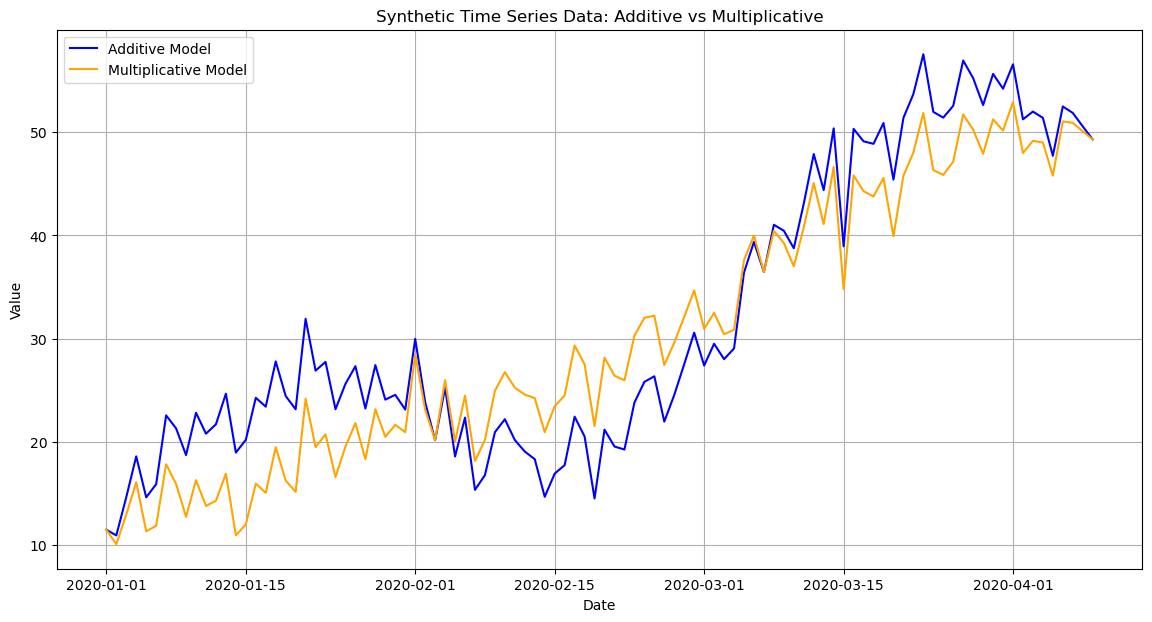

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Create a time index
time = pd.date_range(start='2020-01-01', periods=100, freq='D')

# Generate a trend
trend = np.linspace(start=10, stop=50, num=len(time))

# Generate seasonal component (e.g., yearly seasonality)
seasonality = 10 * np.sin(np.linspace(0, 3 * np.pi, len(time)))

# Generate noise
noise = np.random.normal(loc=0, scale=3, size=len(time))

# Create synthetic time series data (Additive)
data_additive = trend + seasonality + noise
time_series_additive = pd.Series(data_additive, index=time)

# Create synthetic time series data (Multiplicative)
data_multiplicative = trend * (1 + (seasonality / 100)) + noise  # Scale the seasonality
time_series_multiplicative = pd.Series(data_multiplicative, index=time)

# Plot both datasets
plt.figure(figsize=(14, 7))
plt.plot(time_series_additive, label='Additive Model', color='blue')
plt.plot(time_series_multiplicative, label='Multiplicative Model', color='orange')
plt.title('Synthetic Time Series Data: Additive vs Multiplicative')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


## Explanation of the Visualization

### **Synthetic Time Series Plot:**
The plot displays both the additive and multiplicative time series data over the same time period.

- **Additive Model (blue line):**
  - The seasonal fluctuations remain constant in amplitude regardless of the trend. 
  - The overall pattern follows a linear trend but adds fixed seasonal variations.

- **Multiplicative Model (orange line):**
  - The seasonal fluctuations scale with the trend. 
  - As the trend increases, the seasonal effect also increases, resulting in larger oscillations in sales. 
  - This makes the seasonal peaks higher during periods of higher trend values and lower during lower trend values.


## When to Use Each Model

### **Additive Model:**
- Use when the amplitude of the seasonal fluctuations is constant across time.
- Suitable when the data doesn’t exhibit a strong trend or when seasonal effects are small compared to the overall trend.

### **Multiplicative Model:**
- Use when the seasonal fluctuations increase or decrease with the level of the series.
- Suitable when the trend is strong, and seasonal effects are proportional to the level of the series.


# Example
## Sales Data for a Seasonal Product

### **Additive Model:**
Imagine a company sells seasonal products, like snow shovels. Their sales grow steadily each year, but the seasonal variation (sales increase in winter) stays the same every year.

**Data:**
- **Trend:** Sales grow by 100 units every year because the company is expanding.
- **Seasonality:** Sales increase by 500 units in winter due to seasonal demand and fall by 200 units in the summer.

| Year | Trend (units) | Seasonality (units) | Observed Sales (units)  |
|------|---------------|----------------------|---------------------------|
| 2020 | 1000          | +500 (Winter)        | \( 1000 + 500 = 1500 \)  |
| 2021 | 1100          | +500 (Winter)        | \( 1100 + 500 = 1600 \)  |
| 2022 | 1200          | +500 (Winter)        | \( 1200 + 500 = 1700 \)  |

**Explanation:**
In the additive model, the seasonal effect is constant (500 units in winter) regardless of how big or small the trend (overall sales) is. The company grows steadily, but the seasonal variation doesn’t change over time.

---

### **Multiplicative Model:**
Now, imagine that the winter sales surge grows as the company grows. The bigger the company gets, the more snow shovels it sells in winter (the seasonal effect becomes larger with growth).

**Data:**
- **Trend:** Sales grow by 100 units every year.
- **Seasonality:** Sales increase by 50% in winter and fall by 20% in summer.

| Year | Trend (units) | Seasonality (%) | Observed Sales (units)  |
|------|---------------|------------------|---------------------------|
| 2020 | 1000          | +50% (Winter)    | (1000 * 1.50 = 1500) |
| 2021 | 1100          | +50% (Winter)    | (1100 * 1.50 = 1650) |
| 2022 | 1200          | +50% (Winter)    | (1200 * 1.50 = 1800) |

**Explanation:**
In the multiplicative model, the seasonal effect scales with the trend. As the company grows, the absolute increase in sales during winter becomes larger (it’s 50% of the trend value, which gets bigger every year).


# Additive Model Dataset
In the additive model, the seasonal variation remains constant each year.

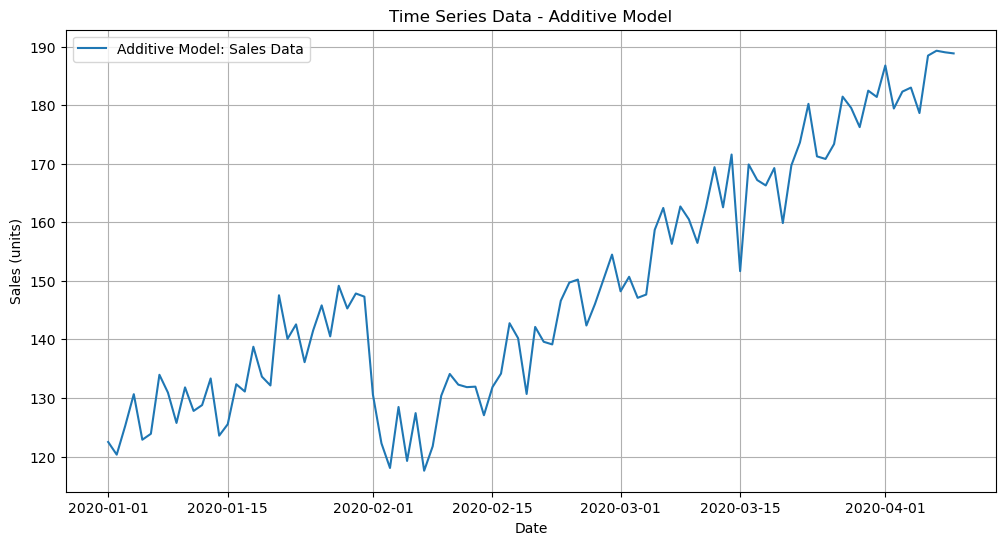

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Create a time index for 100 days
time = pd.date_range(start='2020-01-01', periods=100, freq='D')

# Generate a trend (steady increase)
trend = np.linspace(start=100, stop=200, num=len(time))  # Sales grow from 100 to 200

# Generate constant seasonal component
seasonality = np.array([20 if month in [11, 12, 1] else -10 for month in time.month])  # +20 in winter, -10 in summer

# Generate noise
noise = np.random.normal(loc=0, scale=5, size=len(time))

# Create synthetic time series data
data_additive = trend + seasonality + noise
additive_series = pd.Series(data_additive, index=time)

# Plot the synthetic time series for the additive model
plt.figure(figsize=(12, 6))
plt.plot(additive_series, label='Additive Model: Sales Data')
plt.title('Time Series Data - Additive Model')
plt.xlabel('Date')
plt.ylabel('Sales (units)')
plt.legend()
plt.grid()
plt.show()


## Applying the Additive Model

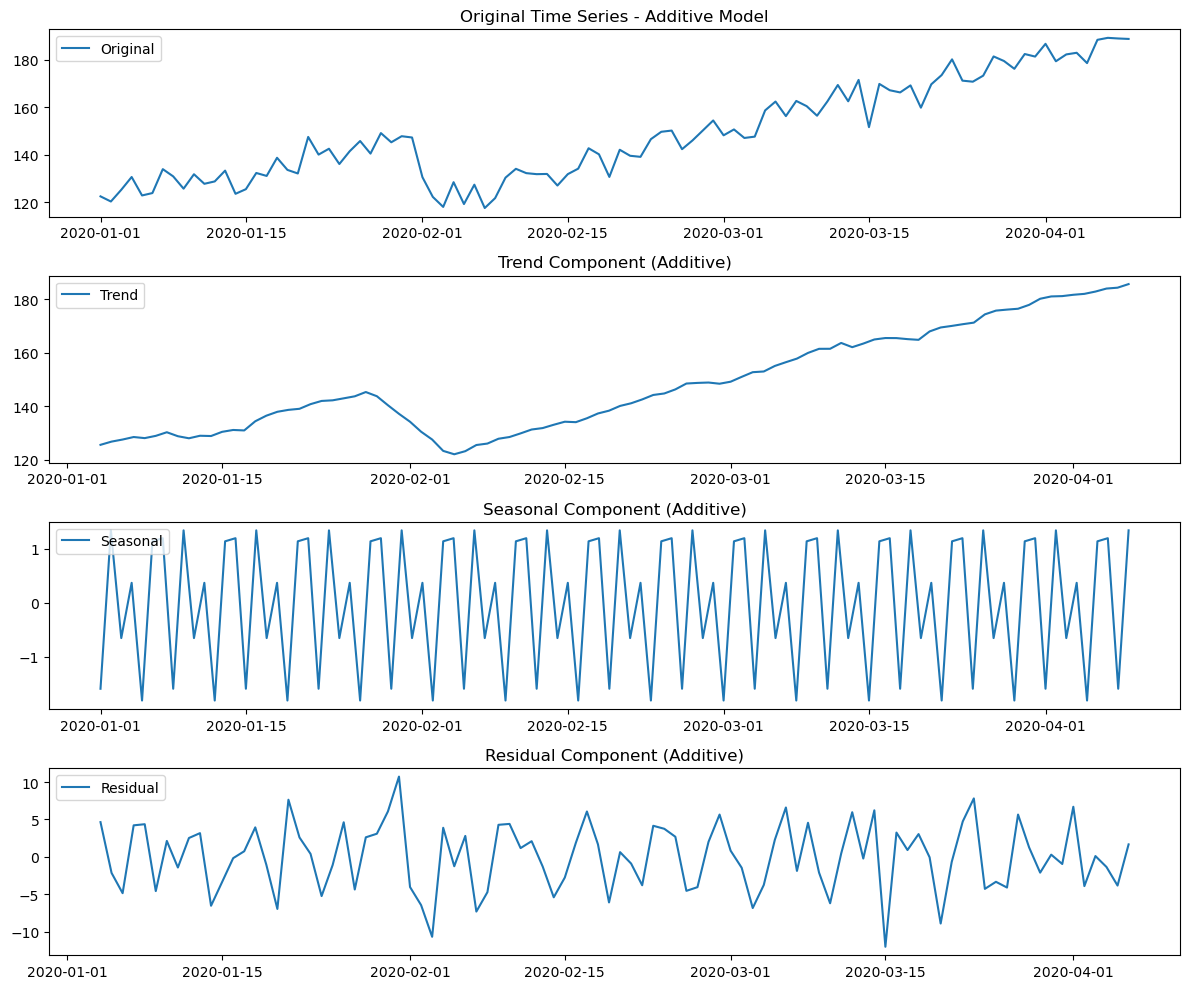

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the additive time series
decomposition_additive = seasonal_decompose(additive_series, model='additive')

# Plotting the decomposition results
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(additive_series, label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series - Additive Model')

plt.subplot(412)
plt.plot(decomposition_additive.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component (Additive)')

plt.subplot(413)
plt.plot(decomposition_additive.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component (Additive)')

plt.subplot(414)
plt.plot(decomposition_additive.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component (Additive)')

plt.tight_layout()
plt.show()


# Multiplicative Model Dataset
In the multiplicative model, the seasonal variation increases as the sales grow. 

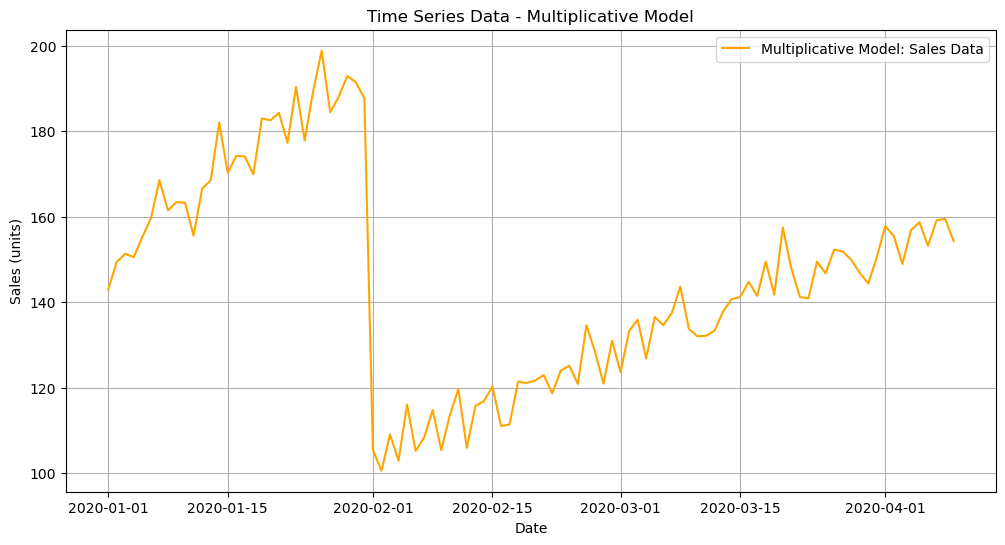

In [4]:
# Create a time index for 100 days
time_multiplicative = pd.date_range(start='2020-01-01', periods=100, freq='D')

# Generate a trend (steady increase)
trend_multiplicative = np.linspace(start=100, stop=200, num=len(time_multiplicative))  # Sales grow from 100 to 200

# Generate increasing seasonal component
seasonality_multiplicative = np.array([1.5 if month in [11, 12, 1] else 0.8 for month in time_multiplicative.month])  # 50% increase in winter

# Generate noise
noise_multiplicative = np.random.normal(loc=0, scale=5, size=len(time_multiplicative))

# Create synthetic time series data
data_multiplicative = trend_multiplicative * seasonality_multiplicative + noise_multiplicative
multiplicative_series = pd.Series(data_multiplicative, index=time_multiplicative)

# Plot the synthetic time series for the multiplicative model
plt.figure(figsize=(12, 6))
plt.plot(multiplicative_series, label='Multiplicative Model: Sales Data', color='orange')
plt.title('Time Series Data - Multiplicative Model')
plt.xlabel('Date')
plt.ylabel('Sales (units)')
plt.legend()
plt.grid()
plt.show()


## Applying the Multiplicative Model

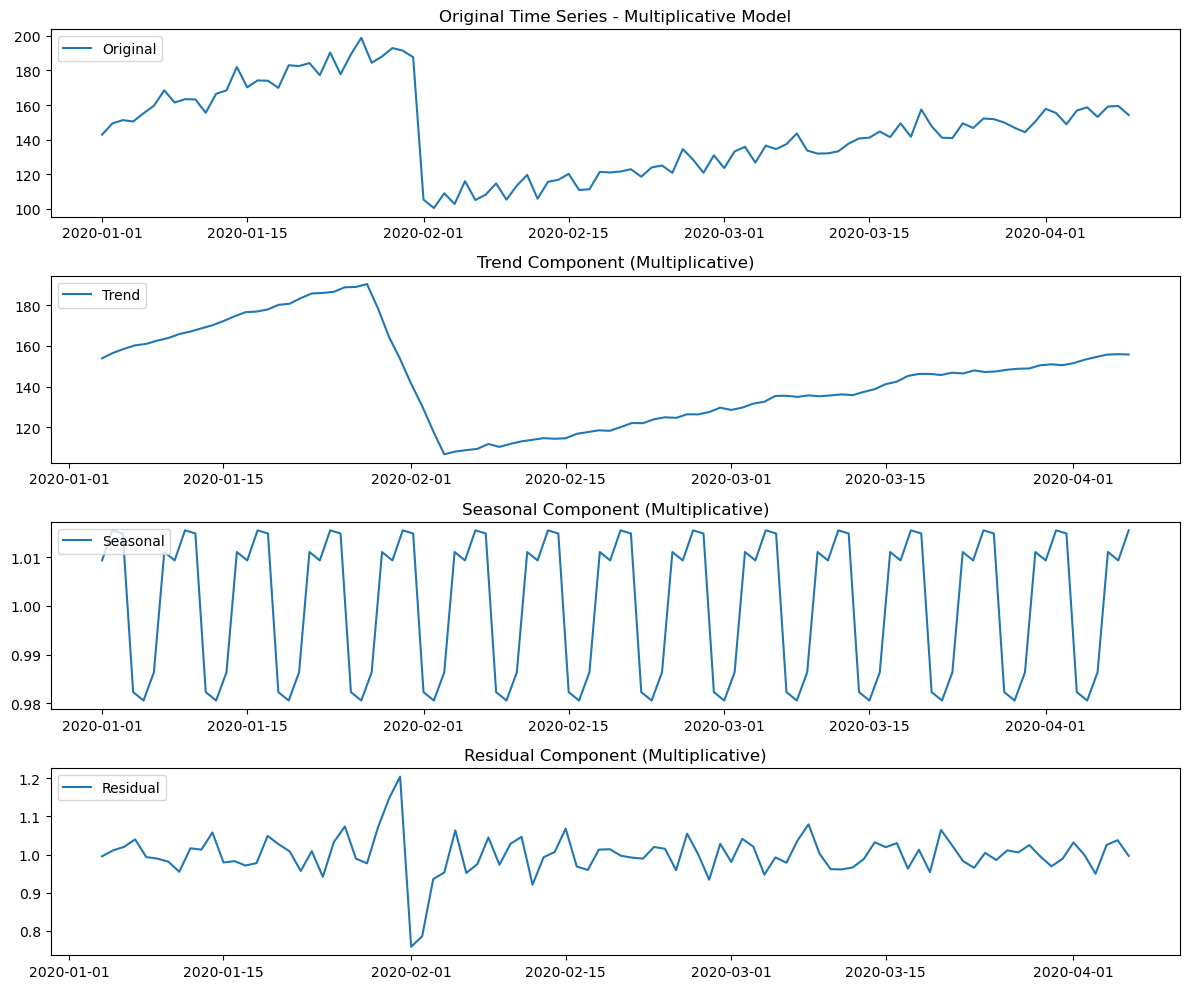

In [5]:
# Decompose the multiplicative time series
decomposition_multiplicative = seasonal_decompose(multiplicative_series, model='multiplicative')

# Plotting the decomposition results
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(multiplicative_series, label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series - Multiplicative Model')

plt.subplot(412)
plt.plot(decomposition_multiplicative.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component (Multiplicative)')

plt.subplot(413)
plt.plot(decomposition_multiplicative.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component (Multiplicative)')

plt.subplot(414)
plt.plot(decomposition_multiplicative.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component (Multiplicative)')

plt.tight_layout()
plt.show()
